In [0]:
!pip3 install torch

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [0]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))

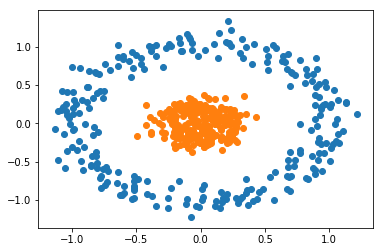

In [0]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])
scatter_plot()

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [0]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [0]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  
  loss = criterion(y_pred, y_data)
  print('epoch:', i, 'loss:', loss.item())
  
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  

epoch: 0 loss: 0.7148522138595581
epoch: 1 loss: 0.6947312355041504
epoch: 2 loss: 0.6955161094665527
epoch: 3 loss: 0.7014897465705872
epoch: 4 loss: 0.7013992667198181
epoch: 5 loss: 0.697472095489502
epoch: 6 loss: 0.6939275860786438
epoch: 7 loss: 0.6928625106811523
epoch: 8 loss: 0.693941593170166
epoch: 9 loss: 0.6954426765441895
epoch: 10 loss: 0.6958808302879333
epoch: 11 loss: 0.6949241757392883
epoch: 12 loss: 0.693157970905304
epoch: 13 loss: 0.6914014220237732
epoch: 14 loss: 0.6901755332946777
epoch: 15 loss: 0.6894775629043579
epoch: 16 loss: 0.6888664364814758
epoch: 17 loss: 0.6877952814102173
epoch: 18 loss: 0.6859349012374878
epoch: 19 loss: 0.6832882165908813
epoch: 20 loss: 0.6800878047943115
epoch: 21 loss: 0.6766111850738525
epoch: 22 loss: 0.6730255484580994
epoch: 23 loss: 0.6693330407142639
epoch: 24 loss: 0.6653968095779419
epoch: 25 loss: 0.661038875579834
epoch: 26 loss: 0.6561349034309387
epoch: 27 loss: 0.6506633758544922
epoch: 28 loss: 0.6446858048439026

Text(0.5, 0, 'epochs')

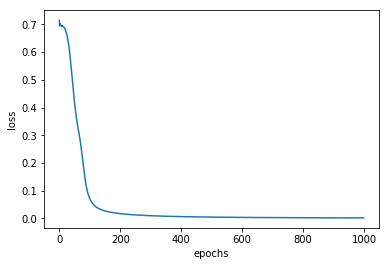

In [0]:
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('epochs')

In [0]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25)
  y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25)
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)

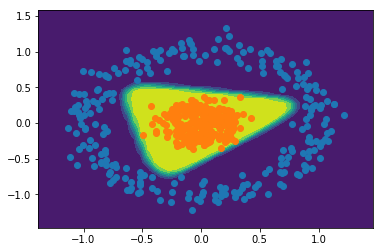

In [0]:
plot_decision_boundary(X,y)
scatter_plot()

Prediction is  1


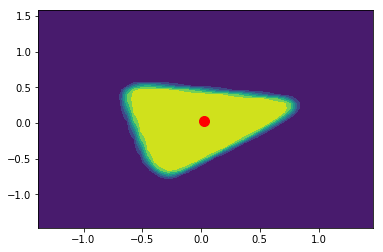

In [0]:
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='red')
print('Prediction is ', prediction)
plot_decision_boundary(X,y)